In [137]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('aminer_proc_complete_cols.csv',index_col=0)

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_51581/1157456617.py:1: DtypeWarning: Columns (0,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('aminer_proc_complete_cols.csv',index_col=0)


In [12]:
len(df)

3994558

In [78]:
df1 = df[['title','year','keywords','authors','fos','doi','venue']]

In [80]:
df1.head()

,title,year,keywords,authors,fos,doi,venue
1,The relationship between canopy parameters and...,2011.0,"['canopy parameters', 'canopy spectrum', 'diff...","[{'_id': '53f45728dabfaec09f209538', 'name': '...","['Agronomy', 'Moisture', 'Hydrology', 'Environ...",10.1109/igarss.2011.6049503,"{'_id': '53a7297d20f7420be8bd4ae7', 'name_d': ..."
2,A solution to the problem of touching and brok...,1993.0,"['handwriting recognition', 'prototypes', 'ima...","[{'_id': '53f46797dabfaeb22f542630', 'name': '...","['Intelligent character recognition', 'Pattern...",10.1109/icdar.1993.395663,"{'_id': '53a72a4920f7420be8bfa51b', 'name_d': ..."
3,Timing yield estimation using statistical stat...,2005.0,"['sequential circuits', 'statistical distribut...","[{'_id': '53f43b03dabfaedce555bf2a', 'name': '...","['Delay calculation', 'Timing failure', 'Monte...",10.1109/iscas.2005.1465124,"{'_id': '53a72e2020f7420be8c80142', 'name_d': ..."
4,360°,2009.0,"['global high technology', 'daily short-distan...","[{'_id': '53f46946dabfaec09f24b4ed', 'name': '...",NaN,10.1145/1665137.1665166,"{'_id': '5390a74a20f70186a0e8b40b', 'raw': 'AC..."
5,300,2007.0,[],"[{'gid': '5b869031e1cd8e14a34a782f', '_id': '5...",NaN,10.1145/1281740.1281746,"{'_id': '5736ae3ad39c4f40a7976010', 'raw': 'SI..."


In [86]:
df1['venue'].value_counts()

{'sid': 'IEEE ACCESS', 'issn': '2169-3536', 't': 'J', 'raw': 'IEEE ACCESS'}                                                                                                         28008
{'sid': 'Lecture Notes in Computer Science', 'issn': '0302-9743', 'online_issn': '1611-3349', 't': 'J', 'raw': 'Lecture Notes in Computer Science'}                                 21510
{'sid': 'SENSORS', 'online_issn': '1424-8220', 't': 'J', 'raw': 'SENSORS'}                                                                                                          18591
{'sid': 'neuroimage', 'issn': '1053-8119', 't': 'J', 'raw': 'NeuroImage', 'publisher': 'Academic Press'}                                                                            15280
{'sid': 'european-journal-of-operational-research', 'issn': '0377-2217', 't': 'J', 'raw': 'European Journal of Operational Research', 'publisher': 'North-Holland'}                 12183
                                                                      

In [ ]:
df1['venue'] = df1['venue'].astype(str)

In [100]:
df2 = df1[df1['venue']!='nan']

In [ ]:
df2['venue_name'] = df2.apply(lambda x:eval(x['venue']), axis=1)

In [ ]:
df2['venue_name'] = df2.apply(lambda x:extract_ven(x['venue_name']), axis=1)

In [132]:
df3 = df2[df2['venue_name']!=0]

In [133]:
len(df3)

3983638

In [144]:
venues = pd.DataFrame(df3['venue_name'].value_counts()).reset_index()
venues.head()

,index,venue_name
0,Lecture Notes in Computer Science,36187
1,SENSORS,28481
2,IEEE ACCESS,28013
3,neuroimage,15280
4,Communications in Computer and Information Sci...,13666


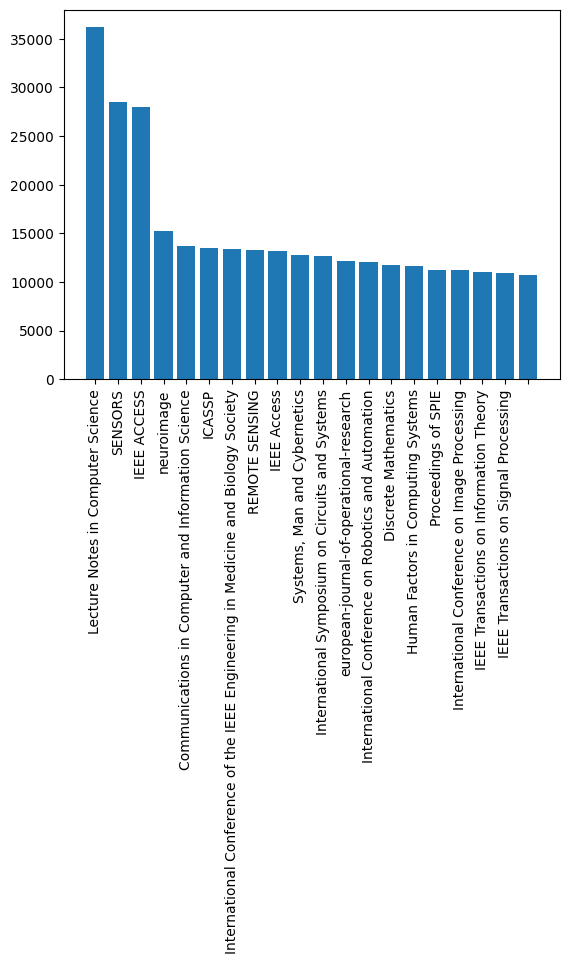

In [155]:
plt.bar(x=venues['index'][:20],height=venues['venue_name'][:20])
plt.xticks(rotation=90)
plt.show()

In [327]:
phrases = '(^.*?[cC][oO][mM][pP].*)|(^.*?[Ii][nN][fF].*)|(^.*?ICASSP.*)|(^.*?[Ii][Ee][Ee][eE].*)|(^.*?[Ss][yY][sS].*)|(^.*?[Rr][oO][bB][oO].*)|(^.*?[nN][Ee][tT].*)|(^.*?[Ii][mM][aA][gG].*)|(^.*?[vV][iI][sS][iI].*)|(^.*?[Tt][eE][cC][hH].*)|(^.*?[Cc][oO][mM][mM].*)|(^.*?[pP][aA][tT][tT][eE].*)|(^.*?[Rr][eE][cC][oO][Gg].*)|(^.*?[Aa][rR][tT][iI][Ff].*)|(^.*?[Ii][nN][tT][eE][lL].*)|(^.*?[aA][uU][tT][oO][mM].*)|(^.*?[Cc][yY][bB][eE][Rr].*)|(^.*?[mM][aA][cC][hH][iI].*)|(^.*?[Ss][iI][gG].*)|(^.*?[kK][Dd][Dd].*)|(^.*?[wW][eE][bB].*)|(^.*?[Ss][oO][fF][tT][wW][aA].*)|(^.*?[pP][rR][oO][cC][eE][sS].*)|(^.*?[aA][lL][gG][oO][rR][Ii].*)|(^.*?[Gg][rR][aA][pP][hH][sS].*)|(^.*?[Dd][aA][tT][aA].*)|(^.*?[Mm][iI][nN][iI][Nn].*)|(^.*?[lL][oO][gG][iI][cC].*)|(^.*?[sS][eE][cC][uU].*)|(^.*?[cC][oO][rR][Rr].*)|(^.*?[jJ][aA][sS][iI][sS][tT].*)|(^.*?[hH][iI][cC][sS][sS].*)|(^.*?[oO][pP][tT][Ii][mM].*)|(^.*?[cC][oO][nN][tT][Rr].*)|(^.*?[sS][oO][cC][iI].*[cC][hh][oO][iI].*)|(^.*?[dD][iI][sS][cC][Rr].*)|(^.*?[sS][eE][nN][sS].*)|(^.*?[sS][cC][iI][eE][nN][Tt][oO].*)|(^.*?ICC.*)'

In [328]:
proc = df3[df3['venue_name'].str.contains(phrases,na=False, case=False,regex=True)]
len(proc)

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_51581/789128375.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  proc = df3[df3['venue_name'].str.contains(phrases,na=False, case=False,regex=True)]


2794178

In [329]:
len(proc)/len(df3)

0.7014136324635923

In [268]:
len(df3)

3983638

In [331]:
proc.head()

,title,year,keywords,authors,fos,doi,venue,venue_name
1,The relationship between canopy parameters and...,2011.0,"['canopy parameters', 'canopy spectrum', 'diff...","[{'_id': '53f45728dabfaec09f209538', 'name': '...","['Agronomy', 'Moisture', 'Hydrology', 'Environ...",10.1109/igarss.2011.6049503,"{'_id': '53a7297d20f7420be8bd4ae7', 'name_d': ...",International Geoscience and Remote Sensing Sy...
2,A solution to the problem of touching and brok...,1993.0,"['handwriting recognition', 'prototypes', 'ima...","[{'_id': '53f46797dabfaeb22f542630', 'name': '...","['Intelligent character recognition', 'Pattern...",10.1109/icdar.1993.395663,"{'_id': '53a72a4920f7420be8bfa51b', 'name_d': ...",International Conference on Document Analysis ...
3,Timing yield estimation using statistical stat...,2005.0,"['sequential circuits', 'statistical distribut...","[{'_id': '53f43b03dabfaedce555bf2a', 'name': '...","['Delay calculation', 'Timing failure', 'Monte...",10.1109/iscas.2005.1465124,"{'_id': '53a72e2020f7420be8c80142', 'name_d': ...",International Symposium on Circuits and Systems
4,360°,2009.0,"['global high technology', 'daily short-distan...","[{'_id': '53f46946dabfaec09f24b4ed', 'name': '...",NaN,10.1145/1665137.1665166,"{'_id': '5390a74a20f70186a0e8b40b', 'raw': 'AC...",ACM SIGGRAPH ASIA 2009 Art Gallery & Emerging ...
5,300,2007.0,[],"[{'gid': '5b869031e1cd8e14a34a782f', '_id': '5...",NaN,10.1145/1281740.1281746,"{'_id': '5736ae3ad39c4f40a7976010', 'raw': 'SI...",SIGGRAPH Computer Animation Festival


In [332]:
proc.to_csv('preprocessed_data/aminer_computer.csv',chunksize=20000)

In [333]:
!ls preprocessed_data/

aminer_computer.csv aminer_idx.csv      aminer_oc_oct13.csv


In [ ]:
%cd preprocessed_data/

In [330]:
pd.set_option('display.max_rows', 5500)

proc['venue_name'].value_counts()[:100]

Lecture Notes in Computer Science                                                   36187
SENSORS                                                                             28481
IEEE ACCESS                                                                         28013
neuroimage                                                                          15280
Communications in Computer and Information Science                                  13666
ICASSP                                                                              13451
International Conference of the IEEE Engineering in Medicine and Biology Society    13415
REMOTE SENSING                                                                      13280
IEEE Access                                                                         13168
Systems, Man and Cybernetics                                                        12752
International Symposium on Circuits and Systems                                     12690
Internatio

In [17]:
# pd.set_option('display.max_columns', 2500)
vens = pd.DataFrame(df['venue'].value_counts().reset_index())

In [57]:
vens['name'] = vens.apply(lambda x:x['name']['sid'] if 'sid' in x['name'] else 0, axis=1)

In [128]:
def extract_ven(x):
    if 'sid' in x:
        if str.isdigit(x['sid']):
            if 'name_d' in x:
                return x['name_d']
            elif 'raw'  in x:
                return x['raw']
        else:
            return x['sid']
    elif 'name_d' in x:
        return x['name_d']
    elif 'raw' in x:
        return x['raw']
    elif 'name' in x:
        return x['name']
    return 0

In [74]:
vens['name'] = vens.apply(lambda x:eval(x['index']), axis=1)

In [75]:
vens['name'] = vens.apply(lambda x:extract_ven(x['name']), axis=1)